## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Thu thập dữ liệu

Ta dùng bộ dữ liệu được thu thập sẵn, lấy ở trang archive.ics.uci.edu qua đường link [tại đây](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

Ta được phép sử dụng bộ dữ liệu này cho mục đích học tập.

Trích dẫn:
> P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Theo mô tả dữ liệu:
> This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Trong bài này, vì môn `Mathematics` và `Portuguese` không liên quan đến nhau nên ta chỉ sử dụng bộ dữ liệu thể hiện `Performance Student` trong môn học `Mathematics`

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
mat_df = pd.read_csv("student-mat.csv", delimiter=';')
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Dữ liệu gồm bao nhiều dòng, bao nhiêu cột?

In [3]:
num_rows = mat_df.shape[0]
num_cols = mat_df.shape[1]
print('Số dòng: ', num_rows)
print('Số cột: ', num_cols)

Số dòng:  395
Số cột:  33


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng tương ứng với thông tin (thông tin cá nhân, điểm) của một học sinh tham gia lớp Toán của hai trường được thu thập dữ liệu. Có vẻ như không xảy ra các dòng có ý nghĩa khác nhau

### Dữ liệu có các dòng bị lặp không?

In [4]:
duplicated_rows = mat_df.duplicated().sum()
if duplicated_rows > 0:
    print("Số dòng lặp: ", duplicated_rows)
else:
    print("Không có dòng lặp")

Không có dòng lặp


Vậy là không có dòng lặp bị lặp trong bộ dữ liệu

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả dữ liệu trong file `student.txt` về các cột trong file dữ liệu "student-mat.csv"

- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu**: father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20, output target)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

Giờ ta xem qua kiểu dữ liệu của các cột nhằm phát hiện cột có kiểu dữ liệu chưa phù hợp

In [5]:
mat_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

**Liệu có vấn đề về kiểu dữ liệu ở những cột có dtype là object ?**

Các cột như "school", "sex", "address", ... đang có kiểu dữ liệu là `object`. Vì kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong python nên các phần tử trong mỗi cột có thể sẽ có các kiểu dữ liệu khác nhau (ta giả sử điều này và cần đi chứng minh). Ta duyệt qua các cột có kiểu dữ liệu là `object` và mong chờ mỗi cột chỉ có một kiểu dữ liệu duy nhất và kiểu đó là `string`

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(set(s.apply(type)))
    return list(dtypes)


obj_cols = mat_df.select_dtypes(include=['object']).columns
mat_df[obj_cols].agg(open_object_dtype).T

,0
school,<class 'str'>
sex,<class 'str'>
address,<class 'str'>
famsize,<class 'str'>
Pstatus,<class 'str'>
Mjob,<class 'str'>
Fjob,<class 'str'>
reason,<class 'str'>
guardian,<class 'str'>
schoolsup,<class 'str'>


Vậy là mọi thứ đều tạm ổn.

Theo file `student.txt` các cột này chứa kiểu dữ liệu `binary` hoặc `nominal`, ta có thể chuyển các dữ liệu về dạng số (0,1,2,...) nếu cần xử lý bằng các thuật toán máy học. Ở đây, nhằm trực quan và dễ quan sát (con người có thể đọc được)thì ta có thể kiểu dữ liệu của các cột về dạng string.

In [7]:
mat_df[obj_cols] = mat_df[obj_cols].astype("string")
mat_df[obj_cols].dtypes

school        string
sex           string
address       string
famsize       string
Pstatus       string
Mjob          string
Fjob          string
reason        string
guardian      string
schoolsup     string
famsup        string
paid          string
activities    string
nursery       string
higher        string
internet      string
romantic      string
dtype: object

### Sự phân bố giá trị của mỗi cột

#### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Theo mô tả trong file `student.txt` và qua quan sát kiểu dữ liệu ở mỗi cột, các cột có kiểu dữ liệu dạng `numeric` là các cột có kiểu dữ liệu `int64`

In [8]:
nume_cols = mat_df.select_dtypes(include=['int64']).columns
nume_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Với các cột có kiểu dữ liệu số, ta tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Các giá trị được làm tròn đến chữ số thập phân thứ 2

In [9]:
index_nume_cols =["missing_percentage", "min", "lower_quartile", "mean", "median", "upper_quartile", "max"]

data_nume_col= [
    (mat_df[nume_cols].isna().mean()*100).round(2),
    mat_df[nume_cols].min().round(2),
    mat_df[nume_cols].quantile(.25).round(2),
    mat_df[nume_cols].mean().round(2),
    mat_df[nume_cols].median().round(2),
    mat_df[nume_cols].quantile(.75).round(2),
    mat_df[nume_cols].max().round(2)
]

nume_col_info_df = pd.DataFrame(data = data_nume_col, columns = nume_cols, index= index_nume_cols)
nume_col_info_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
missing_percentage,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,15.0,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
lower_quartile,16.0,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
mean,16.7,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
median,17.0,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
upper_quartile,18.0,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.0,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


Vậy không có giá trị thiếu ở các cột! Các giá trị cũng không có dấu hiệu bất thường, đúng như những gì trong file `student.txt` mô tả

Đa số các cột numeric được chuẩn hóa về các số dạng các choice (1,2,3,...) theo khoảng đã quy định trước, nên `mean` của các cột đó sẽ chỉ có ý nghĩa ở mức tương đối

Ví dụ:
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
- `mean` của **Medu** là 2.749367


#### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Theo mô tả trong file `student.txt` và qua quan sát kiểu dữ liệu ở mỗi cột, các cột có kiểu dữ liệu dạng `categorical` là các cột có kiểu dữ liệu `string`

In [10]:
cate_cols = mat_df.select_dtypes(include=['string']).columns
cate_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Với các cột có kiểu dữ liệu dạng `categorical`, ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị khác nhau (không xét giá trị thiếu):
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu)

In [11]:
index_cate_cols = ["missing_percentage", "num_values", "value_percentages"]


def count_value_percentages(data):
    return (data.value_counts()/data.count() *100).to_dict()


data_cate_col= np.array([
    (mat_df[cate_cols].isna().mean() *100),
    mat_df[cate_cols].nunique(),
    mat_df[cate_cols].agg(count_value_percentages)
])

cate_col_info_df = pd.DataFrame(data = data_cate_col, columns = cate_cols, index= index_cate_cols)

cate_col_info_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
value_percentages,"{'GP': 88.35443037974684, 'MS': 11.64556962025...","{'F': 52.65822784810127, 'M': 47.34177215189874}","{'U': 77.72151898734178, 'R': 22.278481012658226}","{'GT3': 71.13924050632912, 'LE3': 28.860759493...","{'T': 89.62025316455696, 'A': 10.379746835443038}","{'other': 35.69620253164557, 'services': 26.07...","{'other': 54.936708860759495, 'services': 28.1...","{'course': 36.708860759493675, 'home': 27.5949...","{'mother': 69.11392405063292, 'father': 22.784...","{'no': 87.0886075949367, 'yes': 12.91139240506...","{'yes': 61.26582278481013, 'no': 38.7341772151...","{'no': 54.177215189873415, 'yes': 45.822784810...","{'yes': 50.8860759493671, 'no': 49.11392405063...","{'yes': 79.49367088607595, 'no': 20.5063291139...","{'yes': 94.9367088607595, 'no': 5.063291139240...","{'yes': 83.29113924050633, 'no': 16.7088607594...","{'no': 66.58227848101265, 'yes': 33.4177215189..."


Vậy các cột catgorical cũng không có giá trị thiếu nào. Tuy nhiên ta nhận thấy được số lượng học sinh ở trường `MS` được khảo sát khá thấp so với trường `GP`

## Đưa ra câu hỏi ý nghĩa cần trả lời

### Câu hỏi 1: Một tuần học bao nhiêu giờ để đạt được kết quả điểm toán tối ưu nhất ? 

Đây là một câu hỏi quan trọng cần trả lời, vì nếu biết được thời gian học nào là tối ưu nhất, học sinh có thể dựa vào đó để căn chỉnh thời gian học sao cho không phí quá nhiều thời gian, cũng như đủ thời gian để tiếp thu rèn luyện được lượng kiến thức môn toán này.

#### Tiền xử lý

Cộng điểm 3 học kì của từng học sinh lại thành điểm tổng lưu vào cột `score`. Điểm được lưu ở cả 3 kỳ `G1`, `G2`, `G3` nên ta thống nhất tính một điểm `score` để đánh giá điểm toán của học sinh

In [12]:
mat_df['score'] = mat_df['G1'] + mat_df['G2'] + mat_df['G3']

Đầu tiên, ta sẽ thử nắm bắt tổng quát sự ảnh hưởng của thời gian học lên điểm toán như thế nào.

Theo mô tả : **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

- Ta tính điểm trung bình của điểm toán qua thời gian học
- Thể hiện bằng biểu đồ plot

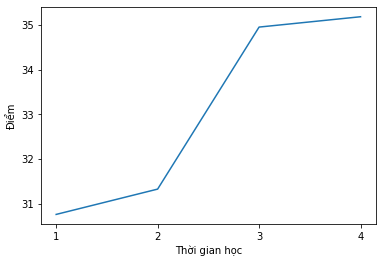

In [13]:
x = sorted(mat_df['studytime'].unique())
m_score = []
for i in range(1, mat_df['studytime'].nunique()+1):
    m_score.append(mat_df[mat_df['studytime']==i]['score'].mean())
plt.plot(x,m_score)
plt.ylabel("Điểm")
plt.xlabel("Thời gian học")
plt.xticks([1,2,3,4])
plt.show()

Nhận xét tổng quát: 
- Điểm số trung bình dao động từ gần 31 đến hơn 35 điểm theo độ tăng thời gian học
- Thời gian học bỏ ra càng nhiều, điểm thu lại càng lớn ! 
- Nhưng, từ thời gian học ở mức 3 lên 4 (từ 5-10h và >10h) tăng rất ít

Với những nhận xét trên ta có kết luận "Thời gian học bỏ ra càng nhiều, điểm thu lại càng lớn", nhưng chưa đủ thông tin để kết luận liệu mức thời gian nào sẽ là tối ưu nhất! 

#### Tiền xử lý:

- Ta sẽ phân loại học sinh dựa vào điểm số:
- Cột `score` sẽ là các số 0, 1, 2, 3, 4:
- 0 - 0 <= score <10 - Yêu
- 1 - 10 <= score <20 - Trung bình
- 2 - 20 <= score <40 - Khá
- 3 - 40 <= score <50 - Giỏi
- 4 - 50 <= score <=60 - Xuất sắc

In [14]:
df = mat_df.copy()
df.loc[df['score'].isin(list(range(10))),'score']=0
df.loc[df['score'].isin(list(range(10,20))),'score']=1
df.loc[df['score'].isin(list(range(20,40))),'score']=2
df.loc[df['score'].isin(list(range(40,50))),'score']=3
df.loc[df['score'].isin(list(range(50,61))),'score']=4
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,2


Tiếp theo, ta sẽ tìm hiểu sự ảnh hưởng của thời gian học lên từng phân loại học lực:
- Tính số lượng học sinh của từng phân loại học lực theo mức thời gian học
- Vẽ biểu đồ plot thể hiện

In [15]:
total = []
for i in range(5):
    result = (df[df['score']==i]['studytime'].value_counts()).to_dict()
    if 4 not in result.keys():
        result[4]=0
    result = dict(sorted(result.items()))
    total.append(list(result.values()))

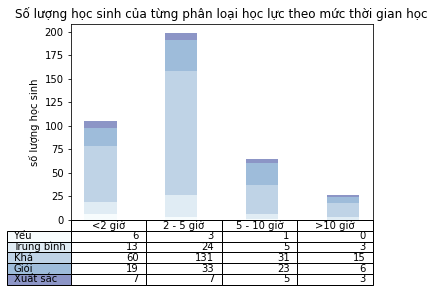

In [16]:
data = total

columns = (1, 2, 3, 4)
rows = [0, 1, 2, 3, 4]

colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) 
bar_width = 0.4

y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset += data[row]

cell_text = data

the_table = plt.table(cellText=cell_text,
                      rowLabels=["Yếu", "Trung bình", "Khá", "Giỏi", "Xuất sắc"],
                      rowColours=colors,
                      colLabels=["<2 giờ", "2 - 5 giờ","5 - 10 giờ",">10 giờ"],
                      loc='bottom')

colors = colors[::-1]

plt.subplots_adjust(left=0.2, bottom=0.2)

plt.xticks([])
plt.title('Số lượng học sinh của từng phân loại học lực theo mức thời gian học')
plt.ylabel("số lượng học sinh")

plt.show()

Nhận xét:
- Không có học sinh có điểm toán loại yếu nào học toán >10h một tuần

=> Bổ sung thêm thông tin cho kết luận tổng quát, bỏ nhiều thời gian học thì điểm càng cao
- Số lượng học sinh lựa chọn học toán từ 2-5h mỗi tuần là nhiều nhất và số lượng đạt được điểm khá và giỏi cũng cao nhất

=> "Có thể" 2-5h mỗi tuần là đủ để học toán
- Số lượng học sinh có điểm toán loại xuất sắc giảm dần theo độ tăng mức thời gian học

=> Không hẳn học càng nhiều là càng tốt (14/21 học sinh có điểm toán xuất sắc học toán ở mức <2h và 2-5h)

Tiếp theo, ta xem xét chi tiết độ phân bố học lực theo mức thời gian học bằng biểu đồ tròn (pie chart):
- Tính phần trăm giá trị xuất hiện của các phân loại theo từng mức thời gian học
- Vẽ biểu đồ multi pie chart

In [17]:
result = pd.DataFrame(index=[0,1,2,3,4])
for i in range(1,5):
    result[i] = (df[df['studytime']==i]['score'].value_counts(normalize=True))
result = result.rename(index={0: "Yếu", 1: "Trung Bình", 2: "Khá", 3:"Giỏi", 4:"Xuất sắc"})
result = result.rename(columns={1:"<2 h",2: "2 to 5 h",3:"5 to 10 h",4:">10 h"})
result

,<2 h,2 to 5 h,5 to 10 h,>10 h
Yếu,0.057143,0.015152,0.015385,NaN
Trung Bình,0.123810,0.121212,0.076923,0.111111
Khá,0.571429,0.661616,0.476923,0.555556
Giỏi,0.180952,0.166667,0.353846,0.222222
Xuất sắc,0.066667,0.035354,0.076923,0.111111


array([<AxesSubplot:ylabel='<2 h'>, <AxesSubplot:ylabel='2 to 5 h'>,
       <AxesSubplot:ylabel='5 to 10 h'>, <AxesSubplot:ylabel='>10 h'>],
      dtype=object)

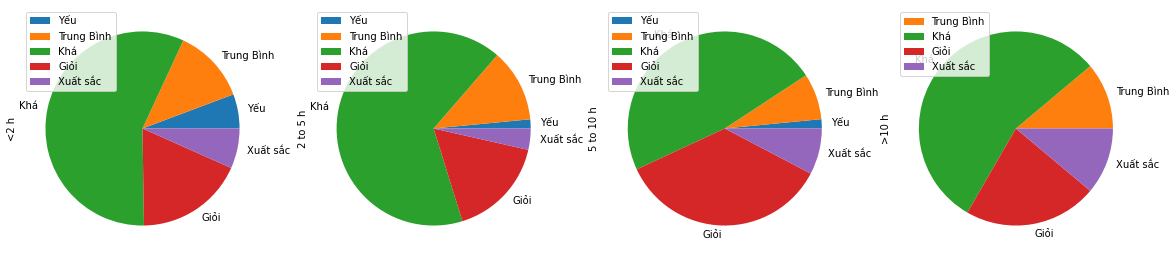

In [18]:
result.plot.pie(subplots=True, figsize=(20,20))

Nhận xét:
- Số lượng điểm khá luôn chiếm phần lớn với mọi mức thời gian
- Phần trăm điểm giỏi tăng mạnh ở mức thời gian 5-10h. Song, phần trăm khá cũng giảm tương đương

=> Đổi mức thời gian học từ 2-5h -> 5-10h sẽ giúp học sinh có điểm toán khá cải thiện thành tích đáng kể 
- Phần trăm điểm trung bình + điểm yếu có vẻ giảm dần theo độ tăng mức thời gian

Từ các nhận xét, ta có kết luận:
1. Thời gian học càng lớn thì khả năng bị điểm kém sẽ càng giảm 
2. Mức 1 và 2 là khoảng thời gian tương đối đủ tiếp thu môn toán
3. Nếu đang có điểm toán khá hãy thử tăng thời gian học lên mức 3 (5-10h mỗi tuần)
4. Đối với các cá nhân muốn có điểm toán xuất sắc, bỏ ra nhiều thời gian thôi chưa đủ !

### Câu hỏi 2: Đâu là những đặc điểm dễ nhận thấy của học sinh có thành tích tốt?

Việc trả lời câu hỏi này sẽ giúp ích cho cả học sinh lẫn giáo viên

- Học sinh: với những đặc điểm mà học sinh có thể điều chỉnh, nhằm nâng cao thành tích của mình thì học sinh cần xem xét để có thể điều chỉnh cho phù hợp. Còn với những đặc điểm không thay đổi được ví dụ như nghề nghiệp bố mẹ,... thì chỉ mang tính chất tham khảo
- Giáo viên: Với giáo viên hay bất cứ người nào quan sát kết quả phân tích dữ liệu, đều có thể dự đoán được khả năng của từng học sinh dựa trên đặc điểm của từng học sinh và đặc điểm dễ nhận thấy ở những học sinh có thành tích tốt

#### Tiền xử lý dữ liệu

Ta cần tìm ra 6 thuộc tính mà điểm số `score` phụ thuộc vào nhiều nhất, từ đó mới tiến hành phân tích để tìm ra đặc điểm dễ nhận thấy (chiếm đại đa số) trong từng thuộc tính.

Tại sao lại **6** thuộc tính? Ta không thể phân tích tất cả các thuộc tính. Chúng ta chỉ phân tích những biến tương quan với điểm số `score` nhất. Ta chọn **6**, vì nó vừa đáp ứng tiêu chí chỉ chọn một vài biến tương quan nhất với `score`, vừa có thể trình bày đẹp, cân xứng ở bước vẽ đồ thị bên dưới.


Các bước tiền xử lý dữ liệu

- Bước 1: Tính tỷ số tương quan `Correlation Ratio` và chọn ra **6** thuộc tính (cột) có tỷ số tương quan lớn nhất. Tại sao lại tính tỷ số tương quan mà không phải là hệ số tương quan? Các biến ở đây bao gồm và biến numeric và categorical vậy nên ta không thể áp dụng công thức hệ số tương quan Pearson, Kendall, hay Spearman. May thay ta tìm được một giải pháp thay thế đó là tính tỷ số tương quan `Correlation Ratio`. Tuy nhiên tỷ số tương quan `Correlation Ratio` chỉ có thể đánh giá mối quan hệ chặt chẽ giữa các biến chứ không thể xác định được chiều hướng của mỗi quan hệ như hệ số tương quan.
- Bước 2: Ta chọn ra những học sinh có thành tích tốt (điểm thuộc loại `Giỏi` được đánh giá theo tiêu chí `score` >=40 điểm ở trên) và lưu vào DataFrame `top_corr_df`

Bước 1: Tính tỷ số tương quan `Correlation Ratio` và chọn ra 6 thuộc tính (cột) có tỷ số tương quan lớn nhất.

Hàm tính Correlation Ratio

In [167]:
def correlation_ratio(categories, measurements):
    id_cat = np.unique(categories, return_inverse=True)[1]
    
    ssa = 0
    ssb = 0
    for i in np.unique(id_cat):
        sub = measurements[np.argwhere(id_cat == i).flatten()]
        ssa += np.sum((sub - np.mean(sub)) ** 2)
        ssb += len(sub) * (np.mean(sub) - np.mean(measurements)) ** 2

    return np.sqrt(ssb / (ssb + ssa))

Tính tỷ số tương quan `Correlation Ratio` cho từng cột và chọn ra **6** thuộc tính (cột) có tỷ số tương quan lớn nhất

In [168]:
corr_columns = mat_df.apply(correlation_ratio, measurements=mat_df['score']).\
    sort_values(ascending=False).iloc[4:10].index.tolist()
corr_columns

['failures', 'absences', 'Medu', 'Mjob', 'Fedu', 'higher']

Bước 2: Từ dữ liệu ban đầu `mat_df`, ta chọn ra những học sinh có thành tích tốt (điểm `score` >= 40) lưu vào DataFrame `top_corr_df`

In [170]:
top_corr_df = mat_df.loc[mat_df.score>=40][corr_columns]
top_corr_df.head()

,failures,absences,Medu,Mjob,Fedu,higher
3,0,2,4,health,2,yes
5,0,10,4,services,3,yes
8,0,0,3,services,2,yes
9,0,0,3,other,4,yes
12,0,2,4,health,4,yes


#### Phân tích dữ liệu

Từ các thuộc tính (cột) được chọn, ta cần tìm ra những đặc điểm dễ thấy trong các thuộc tính (cột) đó.

Các bước phân tích dữ liệu:
- Bước 1: Với mỗi thuộc tính (cột) trong DataFrame `top_corr_df` ta tìm tần suất xuất hiện của các giá trị ở từng thuộc tính `cột`. Mục đích của việc này là giúp ta có thể xác định nhanh giá trị nào trong mỗi thuộc tính (cột) chiếm ưu thế, đại đa số
- Bước 2: Vẽ biểu đồ thể hiện tần suất xuất hiện các giá trị ở từng cột

Bước 1: Với mỗi thuộc tính (cột) trong DataFrame `top_corr_df`, ta tìm tần suất xuất hiện của các giá trị ở từng thuộc tính `cột`

In [165]:
value = []
freq = []
for i in range(len(corr_columns)):
    value.append(top_corr_df.iloc[:,i].value_counts().index.values)
    freq.append(top_corr_df.iloc[:,i].value_counts().values)

Bước 2: Vẽ biểu đồ thể hiện tần suất xuất hiện các giá trị ở từng cột

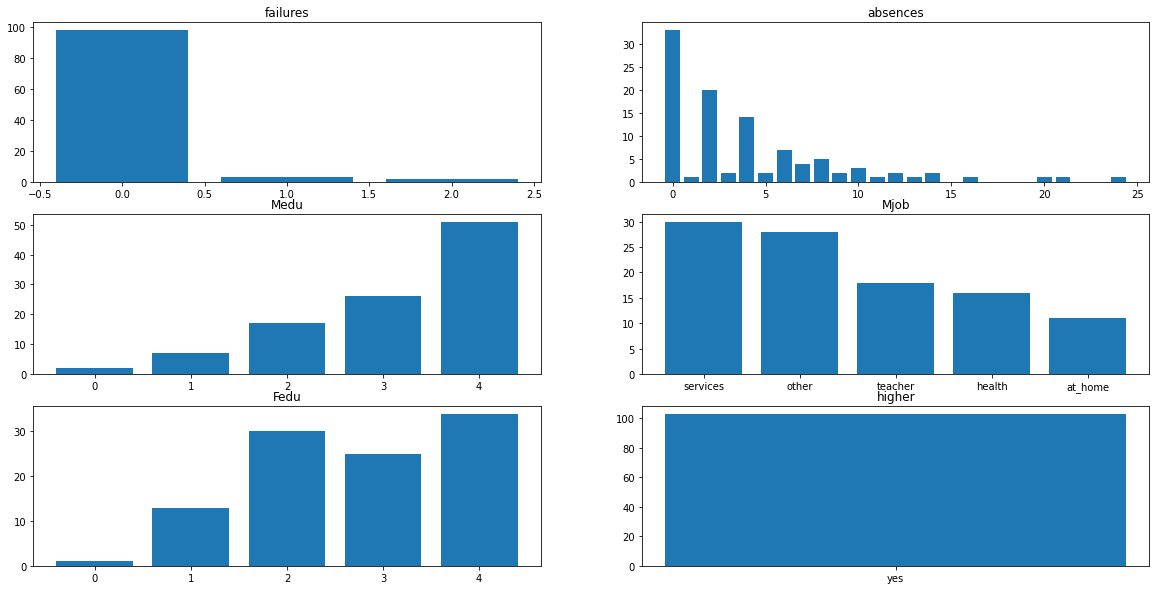

In [171]:
max_rows = 3
max_columns = 2
figure, axis = plt.subplots(max_rows, max_columns)
figure.set_figheight(10)
figure.set_figwidth(20)

k = 0
for i in range(max_rows):
    for j in range(max_columns):
        if k >= len(corr_columns):
            break
        axis[i, j].bar(value[k], freq[k])
        axis[i, j].set_title(columns[k])
        k = k + 1

#### Trả lời câu hỏi

Từ kết quả phân tích trên, ta có thể đưa ra một số nhận định như sau:

- Những học sinh có thành tích tốt, đa số **chưa từng rớt** một lớp học nào trong quá khứ. Một bộ phận tiểu số rớt từ 1-2 lớp, có thể sau thất bại họ đã có ý chí vươn lên để đạt được kết quả như hiện nay
- Những học sinh có thành tích tốt thường **ít vắng học** trên lớp
- Những học sinh có thành tích tốt thường có **bố mẹ đạt trình độ học vấn higher education**. Việc bố mẹ có trình độ học vấn càng cao, có vẻ đã ảnh hưởng đến việc đạt học tập của con cái, qua ý thức, cách nuôi dạy từ nhỏ?. Nhưng cũng không thể nói rằng việc bố mẹ có trình độ học vấn không cao sẽ ảnh hưởng đến thành tích học tập của các con
- Những học sinh có thành tích tốt thường có **nghề nghiệp của mẹ là services** (trong civil services - theo mô tả dữ liệu, ví dụ như administrative hoặc police), điều này có thể xem xét là một yếu tố thuộc về truyền thống gia đình?
- Những học sinh có thành tích học tập tốt đều có ý định **học lên cao**. Có vẻ như không có ai muốn dừng việc học tập trong khi đạt được thành tích tốt như hiện tại.

## Nhìn lại quá trình làm đồ án

### Mỗi thành viên đã gặp những khó khăn gì?

- Gia Minh:
- Việt Cường:

### Mỗi thành viên học được những gì hữu ích?

- Gia Minh:
- Việt Cường:

### Nếu có thời gian, nhóm sẽ làm gì?

- Something

## Tài liệu tham khảo

- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9